<a href="https://colab.research.google.com/github/SamLutz/Master-thesis/blob/main/test_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Master Thesis  
Author : Samuel Lutz  
Date: SP 25  
data set 1 : 12 aug - 29 aug  
data set 2 : 07 oct - 24 oct

In [ ]:
!pip install netCDF4
!pip install xarray
!pip install pooch
!pip install windrose
import os
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from datetime import datetime
import matplotlib.pyplot as plt
import pooch
import netCDF4 as nc
import matplotlib.pyplot as plt
from windrose import WindroseAxes

Download data from Onedrive with Pooch & give names to files


In [ ]:
# List of OneDrive files with their URLs
files_urls_1 = [
    'https://unils-my.sharepoint.com/:f:/g/personal/samuel_lutz_unil_ch/Eh8nUEHeGCZCjtWw_x73f_4BifVWdtVadZBfJwPdFZawEA?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EdhDp63kVmxKnYOwZY9c__QBl6ApljIPHZDPrWSL3msYiA?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EZWsSdBQ8lhAuhOd6zj1VIoBNDvSfD-eDV7g-hwq2Aazdg?download=1',
]
files_urls_2 = [
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/ESfJx4dv55hHuA4L2bzb6LkBrHp8JyuSxq1-5oA2XqllvQ?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/Eb6nAx8kQvRIttOz_TQQR9YBORSNw1VoxOgxia_uuM8gzQ?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EXtCNMxKKJRNpmQqto2Mu6QB9ZzwtUPoK_QT6K1j-ScPjA?download=1',
]
# Hashed file values (optional, use None if unknown)
hashes = [None] * (len(files_urls_1) + len(files_urls_2))  # Calculate total length

In [ ]:
file_names_1 = ["Meteostation_08_12.nc", "Meteostation_08_19.nc", "Meteostation_08_26.nc"]
downloaded_files_1 = []  # List for storing the paths of downloaded files

for url, name in zip(files_urls_1, file_names_1):
    file_path = pooch.retrieve(url, known_hash=None, fname=name)  # Save with the right name
    downloaded_files_1.append(file_path)

print("Fichiers téléchargés :", downloaded_files_1)

Fichiers téléchargés : ['/root/.cache/pooch/Meteostation_08_12.nc', '/root/.cache/pooch/Meteostation_08_19.nc', '/root/.cache/pooch/Meteostation_08_26.nc']


In [ ]:
file_names_2 = ["Meteostation_10_07.nc","Meteostation_10_14.nc","Meteostation_10_21.nc"]
downloaded_files_2 = []  # List for storing the paths of downloaded files


for url, name in zip(files_urls_2, file_names_2):
    file_path = pooch.retrieve(url, known_hash=None, fname=name)  # Save with the right name
    downloaded_files_2.append(file_path)

print("Fichiers téléchargés :", downloaded_files_2)

Fichiers téléchargés : ['/root/.cache/pooch/Meteostation_10_07.nc', '/root/.cache/pooch/Meteostation_10_14.nc', '/root/.cache/pooch/Meteostation_10_21.nc']


In [ ]:
for file_path in downloaded_files_1:
    try:
        dataset = xr.open_dataset(file_path)
        print(f"Fichier : {file_path}")
        print("Variables disponibles :", list(dataset.variables))  # Using list for display
        all_variables.append(list(dataset.variables))  # Storing as list
    except Exception as e:
        print(f"Error opening {file_path}: {e}")

Error opening /root/.cache/pooch/Meteostation_08_12.nc: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html
Fichier : /root/.cache/pooch/Meteostation_08_19.nc
Variables disponibles : ['time', 'Batt', 'Ptemp', 'AirTC', 'RH', 'Slrw', 'Slrm', 'WS', 'WindDir', 'Rain', 'BP', 'WindGust', 'time_qual', 'Batt_qual', 'Ptemp_qual', 'AirTC_qual', 'RH_qual', 'Slrw_qual', 'Slrm_qual', 'WS_qual', 'WindDir_qual', 'Rain_qual', 'BP_qual', 'WindGust_qual']
Error opening /root/.cache/pooch/Meteostation_08_19.nc: name 'all_variables' is not defined
Fichier : /root/.cache/pooch/Meteostation_08_26.nc
Variables disponibles : ['time', 'Batt', 'Ptemp', 'AirTC', 'RH', 'Slrw', 'Slrm', 'WS', 'WindDir', 'R

In [ ]:
for file_path in downloaded_files_2:
    try:
        dataset = xr.open_dataset(file_path)
        print(f"Fichier : {file_path}")
        print("Variables disponibles :", list(dataset.variables))  # Using list for display
        all_variables.append(list(dataset.variables))  # Storing as list
    except Exception as e:
        print(f"Error opening {file_path}: {e}")

Fichier : /root/.cache/pooch/Meteostation_10_07.nc
Variables disponibles : ['time', 'Batt', 'Ptemp', 'AirTC', 'RH', 'Slrw', 'Slrm', 'WS', 'WindDir', 'Rain', 'BP', 'WindGust', 'time_qual', 'Batt_qual', 'Ptemp_qual', 'AirTC_qual', 'RH_qual', 'Slrw_qual', 'Slrm_qual', 'WS_qual', 'WindDir_qual', 'Rain_qual', 'BP_qual', 'WindGust_qual']
Error opening /root/.cache/pooch/Meteostation_10_07.nc: name 'all_variables' is not defined
Fichier : /root/.cache/pooch/Meteostation_10_14.nc
Variables disponibles : ['time', 'Batt', 'Ptemp', 'AirTC', 'RH', 'Slrw', 'Slrm', 'WS', 'WindDir', 'Rain', 'BP', 'WindGust', 'time_qual', 'Batt_qual', 'Ptemp_qual', 'AirTC_qual', 'RH_qual', 'Slrw_qual', 'Slrm_qual', 'WS_qual', 'WindDir_qual', 'Rain_qual', 'BP_qual', 'WindGust_qual']
Error opening /root/.cache/pooch/Meteostation_10_14.nc: name 'all_variables' is not defined
Fichier : /root/.cache/pooch/Meteostation_10_21.nc
Variables disponibles : ['time', 'Batt', 'Ptemp', 'AirTC', 'RH', 'Slrw', 'Slrm', 'WS', 'WindDir',

In [ ]:
# Load all files as a dataset
datasets_1 = []
for file in downloaded_files_1:
    try:
        # Explicitly specify the engine as 'netcdf4'
        dataset_1 = xr.open_dataset(file, engine='netcdf4')
        datasets_1.append(dataset_1)
    except Exception as e:
        print(f"Error opening {file}: {e}")

# Merge on a common dimension (e.g. ‘time’)
data_1 = xr.concat(datasets_1, dim="time")

# Inspect the result
print(data_1)

# Save the merged result
data_1.to_netcdf("data_merged_1.nc")

Error opening /root/.cache/pooch/Meteostation_08_12.nc: [Errno -51] NetCDF: Unknown file format: '/root/.cache/pooch/Meteostation_08_12.nc'
<xarray.Dataset> Size: 387kB
Dimensions:        (time: 2016)
Coordinates:
  * time           (time) datetime64[ns] 16kB 2024-08-19 ... 2024-09-01T23:50:00
Data variables: (12/23)
    Batt           (time) float64 16kB 12.67 12.63 12.65 ... 12.64 12.64 12.68
    Ptemp          (time) float64 16kB 19.2 19.24 19.29 ... 22.14 22.02 21.91
    AirTC          (time) float64 16kB 17.6 17.59 17.7 ... 20.44 20.46 20.36
    RH             (time) float64 16kB 79.96 78.38 77.08 ... 81.1 80.9 79.73
    Slrw           (time) float64 16kB 0.001 0.001 0.001 ... 0.001 0.001 0.001
    Slrm           (time) float64 16kB 7.76e-07 8.09e-07 ... 6.385e-07 8.016e-07
    ...             ...
    Slrm_qual      (time) float64 16kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    WS_qual        (time) float64 16kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    WindDir_qual   (time) fl

In [ ]:
# Load all files as a dataset
datasets_2 = []
for file in downloaded_files_2:
    try:
        # Explicitly specify the engine as 'netcdf4'
        dataset_2 = xr.open_dataset(file, engine='netcdf4')
        datasets_2.append(dataset_1)
    except Exception as e:
        print(f"Error opening {file}: {e}")

# Merge on a common dimension (e.g. ‘time’)
data_2 = xr.concat(datasets_2, dim="time")

# Inspect the result
print(data_2)

# Save the merged result
data_2.to_netcdf("data_merged_2.nc")

<xarray.Dataset> Size: 581kB
Dimensions:        (time: 3024)
Coordinates:
  * time           (time) datetime64[ns] 24kB 2024-08-26 ... 2024-09-01T23:50:00
Data variables: (12/23)
    Batt           (time) float64 24kB 12.68 12.65 12.68 ... 12.64 12.64 12.68
    Ptemp          (time) float64 24kB 18.92 18.88 18.87 ... 22.14 22.02 21.91
    AirTC          (time) float64 24kB 17.74 17.74 17.7 ... 20.44 20.46 20.36
    RH             (time) float64 24kB 68.98 69.97 69.99 ... 81.1 80.9 79.73
    Slrw           (time) float64 24kB 0.002 0.001 0.001 ... 0.001 0.001 0.001
    Slrm           (time) float64 24kB 9.246e-07 7.176e-07 ... 8.016e-07
    ...             ...
    Slrm_qual      (time) float64 24kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    WS_qual        (time) float64 24kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    WindDir_qual   (time) float64 24kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Rain_qual      (time) float64 24kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    BP_qual     

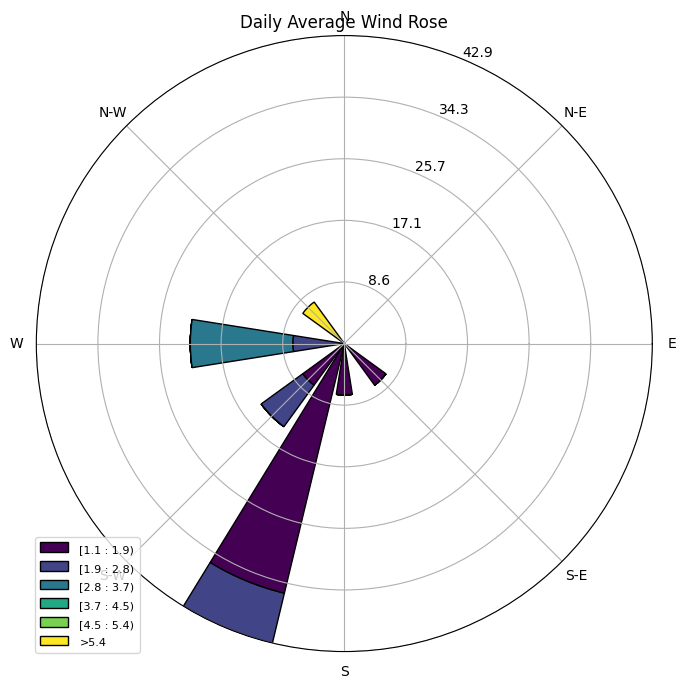

In [ ]:
# Load the merged dataset
file_path = "data_merged_1.nc"
ds = xr.open_dataset(file_path, engine="netcdf4")

# Convert time to pandas datetime index
ds["time"] = ds["time"].astype("datetime64[ns]")

# Group by day and calculate mean
daily_avg = ds.groupby("time.date").mean()

# Extract daily mean wind speed (WS) and direction (WindDir)
wind_speed = daily_avg["WS"].values
wind_direction = daily_avg["WindDir"].values

# Create wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="windrose")
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor="black")

# Customize plot
ax.set_title("Daily Average Wind Rose")
ax.set_legend()
plt.show()

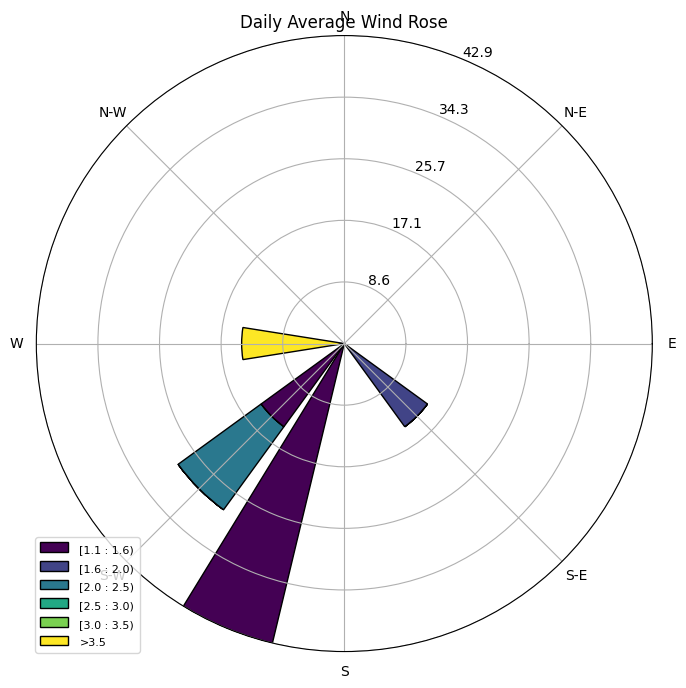

In [ ]:
# Load the merged dataset
file_path = "data_merged_2.nc"
ds = xr.open_dataset(file_path, engine="netcdf4")

# Convert time to pandas datetime index
ds["time"] = ds["time"].astype("datetime64[ns]")

# Group by day and calculate mean
daily_avg = ds.groupby("time.date").mean()

# Extract daily mean wind speed (WS) and direction (WindDir)
wind_speed = daily_avg["WS"].values
wind_direction = daily_avg["WindDir"].values

# Create wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="windrose")
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor="black")

# Customize plot
ax.set_title("Daily Average Wind Rose")
ax.set_legend()
plt.show()

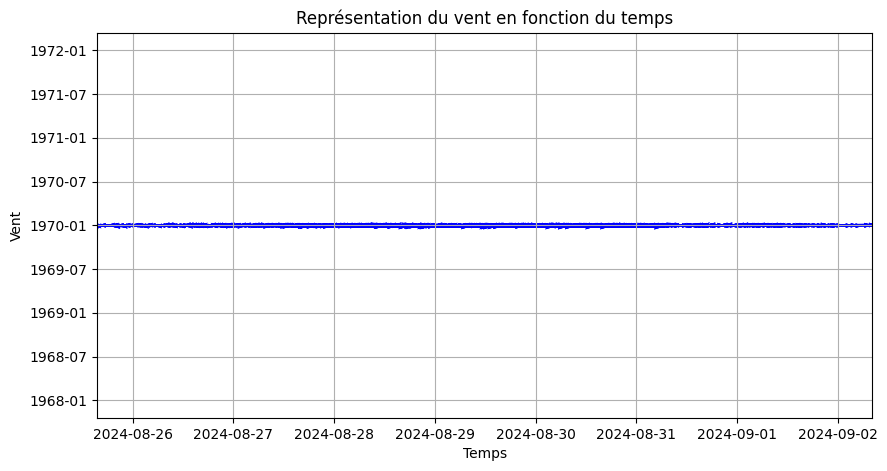

In [ ]:
# Charger le dataset NetCDF
data = xr.open_dataset("data_merged_2.nc", engine='netcdf4')

# Extraire le temps, la vitesse du vent (WS) et la direction du vent (WindDir)
time = data['time'].values
wind_speed = data['WS'].values  # Assurez-vous que 'WS' est bien le nom de la vitesse du vent
wind_dir = data['WindDir'].values  # Assurez-vous que 'WindDir' est bien le nom de la direction du vent

# Convertir la direction en radians et calculer les composantes U et V du vent
wind_dir_rad = np.radians(270 - wind_dir)  # Ajustement pour que 0° = Nord
U = wind_speed * np.cos(wind_dir_rad)
V = wind_speed * np.sin(wind_dir_rad)

# Créer un graphique quiver (flèches)
plt.figure(figsize=(10, 5))
plt.quiver(time, np.zeros_like(time), U, V, angles="xy", scale_units="xy", scale=1, width=0.002, color='b')
plt.xlabel("Temps")
plt.ylabel("Vent")
plt.title("Représentation du vent en fonction du temps")
plt.grid()
plt.show()